In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cnn_object=Sequential()
cnn_object.add(Conv2D(64,3,3,input_shape=(64,64,3),activation='relu'))
cnn_object.add(MaxPool2D(pool_size=(2,2)))
cnn_object.add(Conv2D(32,3,3,activation='relu'))
cnn_object.add(MaxPool2D(pool_size=(2,2)))
cnn_object.add(Flatten())
cnn_object.add(Dense(units=10,activation='relu'))
cnn_object.add(Dense(units=1,activation='sigmoid'))

C:\Users\SHRIKANTH\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
C:\Users\SHRIKANTH\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


In [3]:
cnn_object.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory('C:\Flipkart_data\Training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory('C:\Flipkart_data\Testing_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=200,
        epochs=10,
        validation_data=test_set,
        validation_steps=800)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
200/200 [==============================] - 228s 1s/step - loss: 0.3890 - accuracy: 0.8139 - val_loss: 0.1634 - val_accuracy: 0.9250
Epoch 2/10
200/200 [==============================] - 225s 1s/step - loss: 0.1160 - accuracy: 0.9609 - val_loss: 0.0084 - val_accuracy: 0.9500
Epoch 3/10
200/200 [==============================] - 223s 1s/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0023 - val_accuracy: 0.9500
Epoch 4/10
200/200 [==============================] - 223s 1s/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0149 - val_accuracy: 0.9500
Epoch 5/10
200/200 [==============================] - 222s 1s/step - loss: 0.0334 - accuracy: 0.9887 - val_loss: 0.0019 - val_accuracy: 0.9500
Epoch 6/10
200/200 [==============================] - 224s 1s/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 2.4799 - val_accuracy: 0.9500
Epoch 7/10
200/200 [==============================] - 223s 1s

In [10]:
train_set.class_indices

{'Men_Shirt': 0, 'Men_TShirt': 1}

In [8]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('C:\Flipkart_data\Single_prediction\img_01.jpeg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn_object.predict(test)

if result[0][0]==1:
  print('TShirt')
else:
  print('Shirt')

Shirt


In [12]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('C:\Flipkart_data\Single_prediction\img_03.jpeg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn_object.predict(test)

if result[0][0]==1:
  print('TShirt')
else:
  print('Shirt')

TShirt


In [4]:
# Data Augmentation

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=32,
                                               directory='C:\Flipkart_data\Training_set',
                                               shuffle=True,
                                               target_size=(150,150))

Found 240 images belonging to 3 classes.


In [13]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

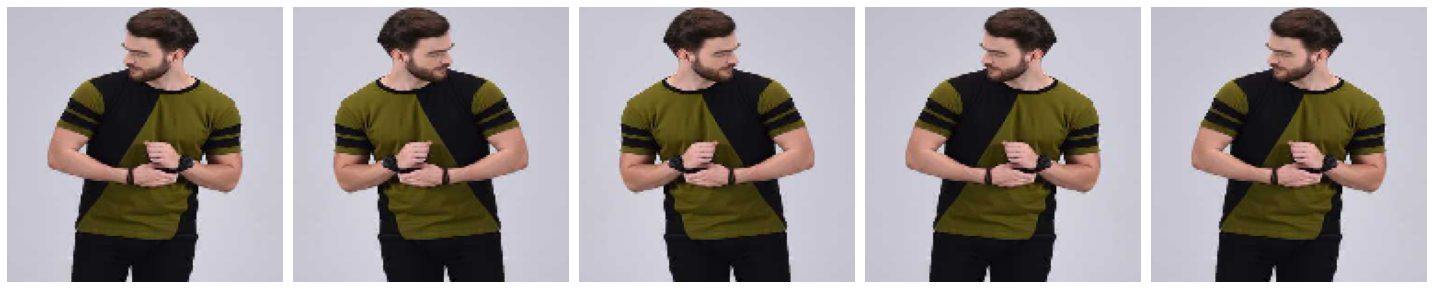

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 240 images belonging to 3 classes.


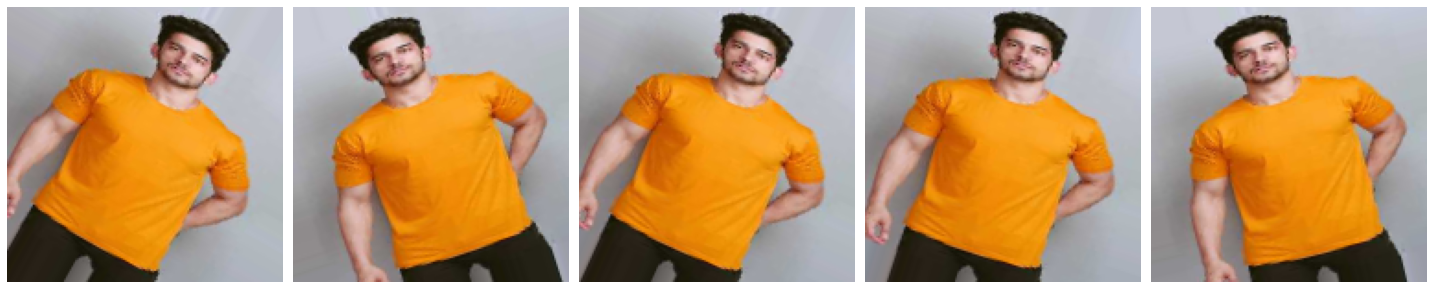

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=-30)

train_data_gen = image_gen.flow_from_directory(batch_size=32,
                                               directory='C:\Flipkart_data\Training_set',
                                               shuffle=True,
                                               target_size=(150,150))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Found 240 images belonging to 3 classes.


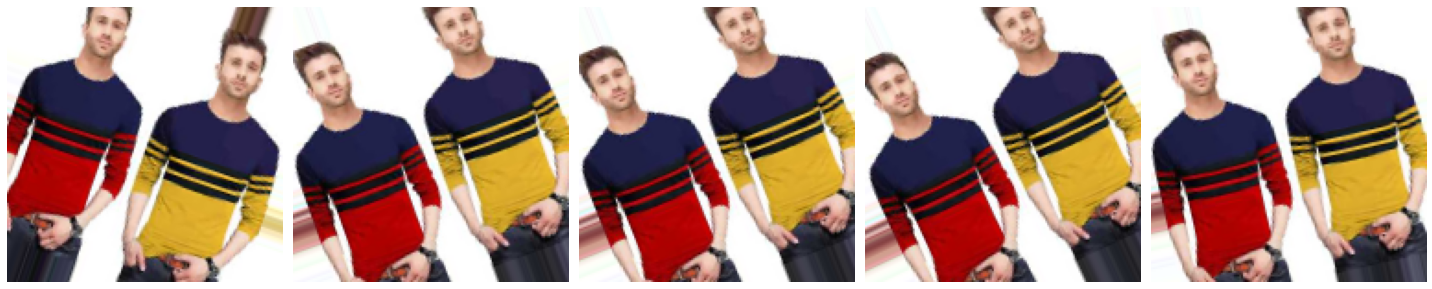

In [23]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)

train_data_gen = image_gen.flow_from_directory(batch_size=32,
                                               directory='C:\Flipkart_data\Training_set',
                                               shuffle=True,
                                               target_size=(150,150))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [24]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [28]:
img= cv2.imread(r"C:/Flipkart_data/Training_set/Men_Shirt/img_123.jpeg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

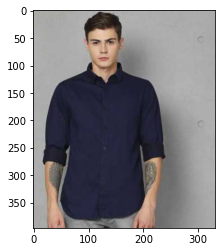

In [29]:
plt.imshow(img)
plt.show()

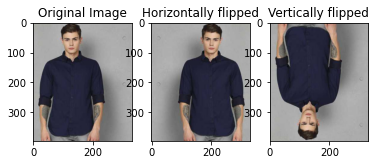

In [30]:
#Flipping images
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

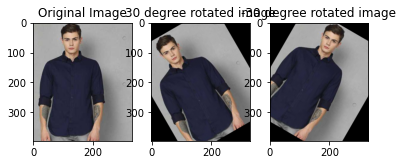

In [32]:
#rotating images

r_image = rotate(img, angle=30) 
r_image1 = rotate(img, angle=-30)

plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)

plt.imshow(r_image)
plt.title("30 degree rotated image")
plt.subplot(133)

plt.imshow(r_image1)
plt.title("-30 degree rotated image")
plt.show()

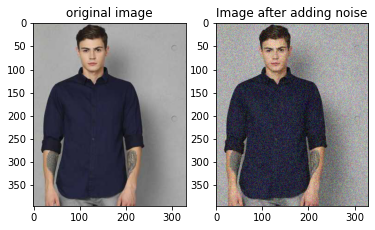

In [33]:
noisy_image= random_noise(img)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

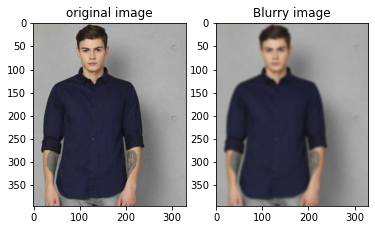

In [34]:
blur_image= cv2.GaussianBlur(img, (11,11),0)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)